In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
df = pd.read_csv("uber.csv")

In [28]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [29]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [31]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [32]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [35]:
df = df.drop(columns=['Unnamed: 0','key','pickup_datetime'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.7 MB


In [37]:
(df.fare_amount==0).any()

np.True_

In [38]:
df=df[df['fare_amount']!=0]

In [39]:
(df.fare_amount==0).any()

np.False_

In [40]:
from math import radians, cos, sin, sqrt, atan2
# The Haversine distance is a formula used to calculate the shortest distance between two points on the Earth's surface, given their latitude and longitude

def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of the Earth in km
    dlon = radians(lon2 - lon1)
    dlat = radians(lat2 - lat1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                   row['dropoff_longitude'], row['dropoff_latitude']), axis=1)


In [41]:
(df.distance_km == 0).any()

np.True_

In [42]:
df = df[df['distance_km']!= 0]

In [43]:
(df.distance_km == 0).any()

np.False_

<Axes: ylabel='distance_km'>

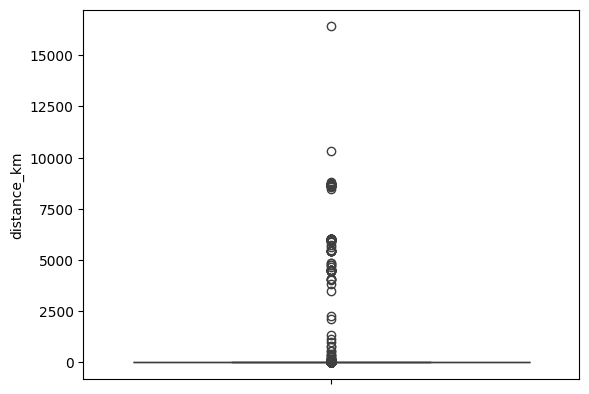

In [44]:
sns.boxplot(df['distance_km'])

In [45]:
df[df['distance_km']>10000]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
75851,15.7,-1340.648410,1644.421482,-3356.666300,872.697628,1,16409.239135
139447,13.7,-74.011042,40.709780,-73.983163,493.533332,4,10321.507661


In [46]:
df = df[df['distance_km']<10000]

<Axes: ylabel='fare_amount'>

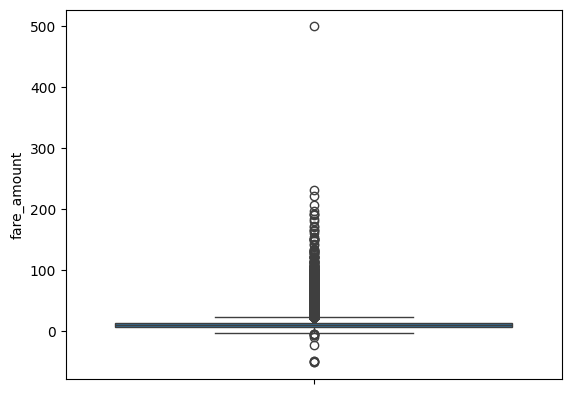

In [48]:
sns.boxplot(df['fare_amount'])

In [49]:
df[df['fare_amount']>300]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
170081,499.0,-73.968377,40.764602,-73.968368,40.7646,1,0.00079


In [50]:
df = df[df['fare_amount']<300]

<Axes: ylabel='passenger_count'>

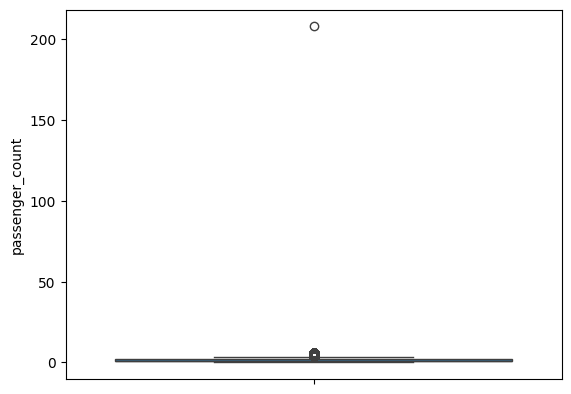

In [51]:
sns.boxplot(df['passenger_count'])

In [56]:
df = df[df['passenger_count']<50]

<Axes: ylabel='passenger_count'>

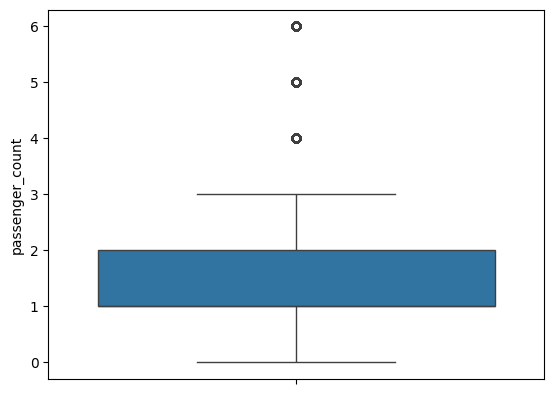

In [57]:
sns.boxplot(df['passenger_count'])

In [20]:
def find_outliers(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [58]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
fare_amount,1.000000,0.011006,-0.008096,0.012803,-0.012082,0.012454,0.025840
pickup_longitude,0.011006,1.000000,-0.413573,0.329369,-0.412313,0.004468,0.303320
pickup_latitude,-0.008096,-0.413573,1.000000,0.045240,0.062674,-0.006406,-0.208441
dropoff_longitude,0.012803,0.329369,0.045240,1.000000,-0.911792,0.004947,0.325141
dropoff_latitude,-0.012082,-0.412313,0.062674,-0.911792,1.000000,-0.007014,-0.233579
passenger_count,0.012454,0.004468,-0.006406,0.004947,-0.007014,1.000000,-0.001722
distance_km,0.025840,0.303320,-0.208441,0.325141,-0.233579,-0.001722,1.000000


<Axes: >

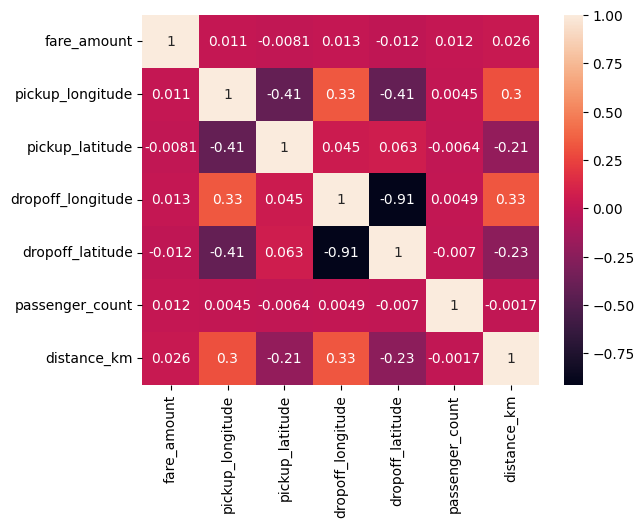

In [59]:
sns.heatmap(df.corr(), annot=True)

In [63]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['distance_km'] = sc.fit_transform(df[['distance_km']])
df['passenger_count'] = sc.fit_transform(df[['passenger_count']])

In [64]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,0.166667,0.000192
1,7.7,-73.994355,40.728225,-73.994710,40.750325,0.166667,0.000280
2,12.9,-74.005043,40.740770,-73.962565,40.772647,0.166667,0.000573
3,5.3,-73.976124,40.790844,-73.965316,40.803349,0.500000,0.000189
4,16.0,-73.925023,40.744085,-73.973082,40.761247,0.833333,0.000510


In [65]:
x = df[['distance_km', 'passenger_count']]
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [66]:
l_model = LinearRegression()
l_model.fit(X_train, y_train)
y_pred_lin = l_model.predict(X_test)

In [67]:
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f'Linear Regression - R²: {r2_lin}, RMSE: {rmse_lin}')


Linear Regression - R²: 0.0006357051791915369, RMSE: 9.70815904173019


In [58]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [60]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest Regression - R²: {r2_rf}, RMSE: {rmse_rf}')

Random Forest Regression - R²: 0.7280893888586215, RMSE: 4.950970987109734
